<a href="https://colab.research.google.com/github/sohaibhassan57/Deep_learning_PIAIC_2020__JUL/blob/master/Family_data_set_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


*Computer Vision*


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_gen = ImageDataGenerator(rescale=1.0/255)
test_data_gen=ImageDataGenerator(rescale=1.0/255)


In [6]:
train_data = train_data_gen.flow_from_directory(
    "/content/drive/My Drive/pics23/train",
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

test_data=test_data_gen.flow_from_directory("/content/drive/My Drive/pics23/test",target_size=(150,150),
                                             batch_size=20,class_mode="categorical")


Found 24 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [7]:
train_data.class_indices

{'1': 0, '2': 1, '3': 2}

In [12]:
test_data.class_indices

{'1': 0, '2': 1, '3': 2}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [9]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(5000, activation='relu'))
model1.add(Dense(3, activation='softmax'))

In [10]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
hist = model1.fit(train_data,epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 374ms/step - loss: 1507.3834 - accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 1s 370ms/step - loss: 415.6895 - accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 0s 114ms/step - loss: 244.5602 - accuracy: 0.4583
Epoch 4/10
2/2 [==============================] - 0s 120ms/step - loss: 107.7933 - accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 1s 392ms/step - loss: 268.7246 - accuracy: 0.4167
Epoch 6/10
2/2 [==============================] - 0s 114ms/step - loss: 187.6091 - accuracy: 0.2917
Epoch 7/10
2/2 [==============================] - 1s 367ms/step - loss: 40.5255 - accuracy: 0.5833
Epoch 8/10
2/2 [==============================] - 0s 114ms/step - loss: 0.6426 - accuracy: 0.9583
Epoch 9/10
2/2 [==============================] - 0s 116ms/step - loss: 7.4850e-06 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 1s 382ms/step - loss: 7.2963e-06 - accuracy: 1.00

Found 6 images belonging to 2 classes.


In [13]:
Y = model1.predict(test_data)


In [14]:
Y

array([[0.0000000e+00, 1.0000000e+00, 2.0129217e-33],
       [0.0000000e+00, 5.1391237e-07, 9.9999952e-01],
       [1.0000000e+00, 2.1684850e-15, 7.5796587e-35],
       [0.0000000e+00, 1.4202076e-08, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.9364770e-36],
       [1.0000000e+00, 2.4084198e-23, 0.0000000e+00]], dtype=float32)

In [15]:
len(Y)

6

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img("/content/drive/My Drive/pics23/test/3/ccc.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
x = x.reshape(1,-1)
model1.predict(x)

array([[0.        , 0.04358917, 0.9564109 ]], dtype=float32)

In [48]:
labels=["Father","Brother","me_sohaib"]
array=model1.predict(x)
arr=array[0].tolist()
num=arr.index(max(arr))
print("prediction is\"",labels[num],"\"")
print("Probability",max(arr))


prediction is" me_sohaib "
Probability 0.9564108848571777


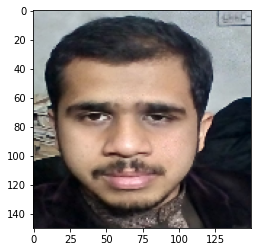

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img=plt.imshow(img)
plt.show()
